## 1. Comparison between Hybrid Strategies (by changing Exploration part) and DATE only

In [26]:
import numpy as np
import pandas as pd
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50

In [27]:
results = glob.glob('../results/performances/fldsh-*')   # fld4- or quick- or www21- or fld-result- or fld4-result- or fldsh or flds
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

### Collecting Result Files: Results of Individual Experiments

In [28]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-revenue'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean13 = df[var].rolling(window=13).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'sampling', 'subsamplings']].iloc[0]))
        full_results[info].append(rolling_mean13)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean13, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

50


### Synthetic data Simulation Results - Hybrid

In [29]:
full_results.keys()

dict_keys(['synthetic,hybrid,DATE/random', 'synthetic,hybrid,DATE/badge', 'synthetic,hybrid,DATE/gATE', 'synthetic,hybrid,DATE/bATE', 'synthetic,DATE,-'])

The number of trials for each setting (Results are averaged):
synthetic,hybrid,DATE/random 10 0.2908
synthetic,hybrid,DATE/badge 10 0.2874
synthetic,hybrid,DATE/gATE 10 0.292
synthetic,hybrid,DATE/bATE 10 0.2923
synthetic,DATE,- 10 0.3032


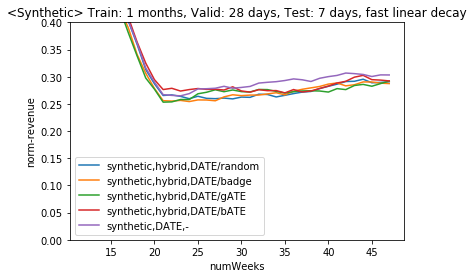

In [30]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(full_results[key])
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-1:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Synthetic> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='lower left')
plt.ylabel(var)
plt.ylim(0,0.4)
plt.xlabel('numWeeks')
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):


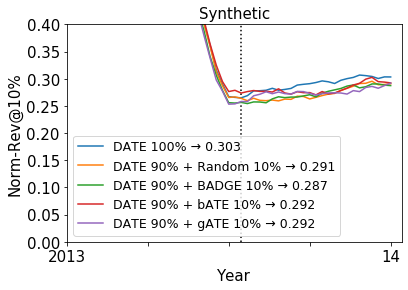

In [33]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in ['synthetic,DATE,-', 'synthetic,hybrid,DATE/random', 'synthetic,hybrid,DATE/badge', 'synthetic,hybrid,DATE/bATE', 'synthetic,hybrid,DATE/gATE']: # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    if key == 'synthetic,hybrid,DATE/gATE':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + gATE 10% → 0.292')    
    if key == 'synthetic,hybrid,DATE/random':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + Random 10% → 0.291')
    if key == 'synthetic,hybrid,DATE/badge':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + BADGE 10% → 0.287')
    if key == 'synthetic,hybrid,DATE/bATE':
        plt.plot(avg_result.index, avg_result, label='DATE 90% + bATE 10% → 0.292') 
    if key == 'synthetic,DATE,-':
        plt.plot(avg_result.index, avg_result, label='DATE 100% → 0.303')
    
plt.legend(loc='lower left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,8,21,34,47], labels=['2013', '','','', 14], fontsize=15)
plt.yticks(fontsize=15)
plt.title('Synthetic', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0,0.4)

plt.show()
plt.close()
f.savefig("hybrid-s.pdf", bbox_inches='tight')

The number of trials for each setting (Results are averaged):


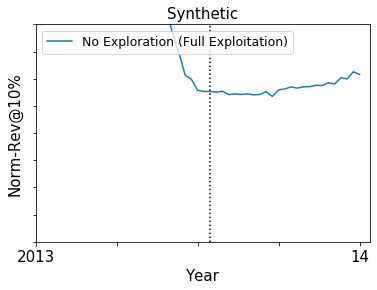

In [225]:
f = plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'synthetic' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     if key == 'synthetic,hybrid,DATE/random':
#         plt.plot(avg_result.index, avg_result, label='Hybrid with 10% Exploration')
    if key == 'synthetic,DATE,-':
        plt.plot(avg_result.index, avg_result, label='No Exploration (Full Exploitation)')
    
plt.legend(loc='upper left', fontsize=12.5)
plt.vlines(23, 0, 1, linestyles ="dotted", colors ="k") 
plt.ylabel(var, fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(ticks=[-5,8,21,34,47], labels=['2013', '','','', 14], fontsize=15)
plt.yticks(fontsize=0.1, color='white')
plt.title('Synthetic', fontsize=15)
plt.ylabel('Norm-Rev@10%', fontsize=15)
plt.ylim(0,0.4)
plt.show()
plt.close()
f.savefig("exploitation-not-fail-s-only-notick.pdf", bbox_inches='tight')